# Neural network implement of Logistic regression
In the previous sections, we use gradient descent to run the Logistic regression model. We mentioned some important concepts, like epochs, mini-batch, etc.. But we didn't implement them. In fact `sklearn` doesn't provide a very good tool to do all these computations. Hence we turn to another package for this model. We are going to use `keras` to build a Logistic regression model, and plot the "loss vs epochs" learning curves.

`keras` is high level Neural network library built upon `tensorflow`. We will talk about Neural network next Chapter. The package is installed along with `tensorflow`. You may follow the [instructions](https://www.tensorflow.org/install) to install it.

To use `keras` to implement logistic regression, we need the following modules: a `Sequential` model, a `Dense` layer. The model is organized as follows.

We still use the horse colic dataset as an example.

In [1]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Note that we need to perform normalization before throwing the data into the model. Here we use the `MinMaxScaler()` from `sklearn` package. The normalization layer in keras is a little bit more complicated and doesn't fit into situation.

In [2]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In the following code, we first set up the model, and then add one `Dense` layer. This `Dense` layer means that we would perform a linear transformation to the input, by the formula $\theta_0+\theta_1x_1+\theta_2x_2+\ldots+\theta_nx_n$. Then there are three arguments:

- `1`: means that there is only output.
- `activation='sigmoid'`: means that we will apply the `sigmoid` function after the linear transformation.
- `input_dim`: means the dimension of the input. Note that this dimension is the dimension of one individual data point. You don't take the size of the training set into consideration.

After building the basic architectal of the model, we need to speicify a few more arguments. In the `model.compile()` step, we have to input the `optimizer`, the loss function (which is the `binary_crossentropy` in our case) and the metrics to test the performance of the model (which is accuracy in our case).

The `optimizer` is how the parameters are updated. The best choice in general is `adam`. The default setting is `RMSprop` and the optimizer discussed in our lecture is `sgd`. We will use `adam` here, since the learning curve it produces looks better (for illustration).

Finally we could train the model. The argument is straightforward.

In [3]:
from tensorflow.keras import models, layers
model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30, validation_data=(X_test, y_test))


Epoch 1/400


1/9 [==>...........................] - ETA: 5s - loss: 0.8099 - accuracy: 0.4333

9/9 [==============================] - 1s 35ms/step - loss: 0.8105 - accuracy: 0.3882 - val_loss: 0.8647 - val_accuracy: 0.3556


Epoch 2/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8833 - accuracy: 0.3000

9/9 [==============================] - 0s 6ms/step - loss: 0.7891 - accuracy: 0.3922 - val_loss: 0.8350 - val_accuracy: 0.3556


Epoch 3/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7973 - accuracy: 0.3667

9/9 [==============================] - 0s 6ms/step - loss: 0.7668 - accuracy: 0.3922 - val_loss: 0.8084 - val_accuracy: 0.4000


Epoch 4/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7818 - accuracy: 0.4333

9/9 [==============================] - 0s 6ms/step - loss: 0.7473 - accuracy: 0.4196 - val_loss: 0.7841 - val_accuracy: 0.4000


Epoch 5/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7390 - accuracy: 0.4333

9/9 [==============================] - 0s 6ms/step - loss: 0.7305 - accuracy: 0.4392 - val_loss: 0.7621 - val_accuracy: 0.4444


Epoch 6/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6918 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.7158 - accuracy: 0.4627 - val_loss: 0.7421 - val_accuracy: 0.4667


Epoch 7/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7706 - accuracy: 0.3000

9/9 [==============================] - 0s 5ms/step - loss: 0.7039 - accuracy: 0.5020 - val_loss: 0.7237 - val_accuracy: 0.5111


Epoch 8/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6981 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5255 - val_loss: 0.7095 - val_accuracy: 0.4889


Epoch 9/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6648 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6829 - accuracy: 0.5608 - val_loss: 0.6970 - val_accuracy: 0.4667


Epoch 10/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6497 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6750 - accuracy: 0.5961 - val_loss: 0.6853 - val_accuracy: 0.4889


Epoch 11/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6594 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6677 - accuracy: 0.6118 - val_loss: 0.6745 - val_accuracy: 0.5333


Epoch 12/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7099 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6610 - accuracy: 0.6275 - val_loss: 0.6653 - val_accuracy: 0.5778


Epoch 13/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7078 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6556 - accuracy: 0.6235 - val_loss: 0.6569 - val_accuracy: 0.6000


Epoch 14/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6315 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6157 - val_loss: 0.6491 - val_accuracy: 0.6000


Epoch 15/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6352 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6470 - accuracy: 0.6157 - val_loss: 0.6419 - val_accuracy: 0.6000


Epoch 16/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5852 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6433 - accuracy: 0.6314 - val_loss: 0.6361 - val_accuracy: 0.6000


Epoch 17/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6576 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6401 - accuracy: 0.6431 - val_loss: 0.6309 - val_accuracy: 0.6444


Epoch 18/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6141 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6371 - accuracy: 0.6549 - val_loss: 0.6267 - val_accuracy: 0.6444


Epoch 19/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6540 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6348 - accuracy: 0.6510 - val_loss: 0.6229 - val_accuracy: 0.6444


Epoch 20/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6976 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6323 - accuracy: 0.6510 - val_loss: 0.6193 - val_accuracy: 0.6444


Epoch 21/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6345 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6304 - accuracy: 0.6510 - val_loss: 0.6153 - val_accuracy: 0.6444


Epoch 22/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6305 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6284 - accuracy: 0.6471 - val_loss: 0.6117 - val_accuracy: 0.6667


Epoch 23/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5761 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6267 - accuracy: 0.6510 - val_loss: 0.6085 - val_accuracy: 0.6667


Epoch 24/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6099 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6250 - accuracy: 0.6510 - val_loss: 0.6060 - val_accuracy: 0.6667


Epoch 25/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6074 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6234 - accuracy: 0.6510 - val_loss: 0.6039 - val_accuracy: 0.7111


Epoch 26/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5638 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.6220 - accuracy: 0.6471 - val_loss: 0.6017 - val_accuracy: 0.6889


Epoch 27/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5933 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6205 - accuracy: 0.6510 - val_loss: 0.6002 - val_accuracy: 0.6889


Epoch 28/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6589 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6191 - accuracy: 0.6549 - val_loss: 0.5986 - val_accuracy: 0.6667


Epoch 29/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6672 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6177 - accuracy: 0.6510 - val_loss: 0.5973 - val_accuracy: 0.6667


Epoch 30/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5887 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6165 - accuracy: 0.6510 - val_loss: 0.5956 - val_accuracy: 0.6667


Epoch 31/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5916 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6151 - accuracy: 0.6471 - val_loss: 0.5942 - val_accuracy: 0.6667


Epoch 32/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5664 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6138 - accuracy: 0.6510 - val_loss: 0.5929 - val_accuracy: 0.6667


Epoch 33/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5922 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6125 - accuracy: 0.6549 - val_loss: 0.5921 - val_accuracy: 0.6667


Epoch 34/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5979 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6113 - accuracy: 0.6667 - val_loss: 0.5908 - val_accuracy: 0.6667


Epoch 35/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6098 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6101 - accuracy: 0.6667 - val_loss: 0.5891 - val_accuracy: 0.6667


Epoch 36/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6632 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6088 - accuracy: 0.6627 - val_loss: 0.5875 - val_accuracy: 0.6667


Epoch 37/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6118 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6075 - accuracy: 0.6667 - val_loss: 0.5867 - val_accuracy: 0.6444


Epoch 38/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7071 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6063 - accuracy: 0.6667 - val_loss: 0.5854 - val_accuracy: 0.6667


Epoch 39/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5572 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6051 - accuracy: 0.6627 - val_loss: 0.5840 - val_accuracy: 0.6667


Epoch 40/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5993 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6041 - accuracy: 0.6667 - val_loss: 0.5827 - val_accuracy: 0.6667


Epoch 41/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5789 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6028 - accuracy: 0.6706 - val_loss: 0.5817 - val_accuracy: 0.6667


Epoch 42/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6166 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6016 - accuracy: 0.6745 - val_loss: 0.5807 - val_accuracy: 0.6667


Epoch 43/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5501 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6008 - accuracy: 0.6784 - val_loss: 0.5791 - val_accuracy: 0.6667


Epoch 44/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6643 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.5994 - accuracy: 0.6863 - val_loss: 0.5791 - val_accuracy: 0.6667


Epoch 45/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6288 - accuracy: 0.6333

9/9 [==============================] - 0s 18ms/step - loss: 0.5982 - accuracy: 0.6863 - val_loss: 0.5783 - val_accuracy: 0.6444


Epoch 46/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6747 - accuracy: 0.6667

9/9 [==============================] - 0s 17ms/step - loss: 0.5971 - accuracy: 0.6863 - val_loss: 0.5771 - val_accuracy: 0.6444


Epoch 47/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6271 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.5961 - accuracy: 0.6863 - val_loss: 0.5759 - val_accuracy: 0.6444


Epoch 48/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4997 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.5950 - accuracy: 0.6863 - val_loss: 0.5750 - val_accuracy: 0.6667


Epoch 49/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5898 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5939 - accuracy: 0.6863 - val_loss: 0.5742 - val_accuracy: 0.6667


Epoch 50/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5262 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5928 - accuracy: 0.6863 - val_loss: 0.5729 - val_accuracy: 0.6667


Epoch 51/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5380 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5919 - accuracy: 0.6863 - val_loss: 0.5716 - val_accuracy: 0.6667


Epoch 52/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5576 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5906 - accuracy: 0.6902 - val_loss: 0.5715 - val_accuracy: 0.6667


Epoch 53/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6138 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5897 - accuracy: 0.6902 - val_loss: 0.5709 - val_accuracy: 0.6667


Epoch 54/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6469 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.5887 - accuracy: 0.6941 - val_loss: 0.5703 - val_accuracy: 0.6667


Epoch 55/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5755 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5875 - accuracy: 0.6980 - val_loss: 0.5694 - val_accuracy: 0.6667


Epoch 56/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5889 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5867 - accuracy: 0.6980 - val_loss: 0.5683 - val_accuracy: 0.6667


Epoch 57/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5856 - accuracy: 0.7020 - val_loss: 0.5677 - val_accuracy: 0.6667


Epoch 58/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6671 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5847 - accuracy: 0.7098 - val_loss: 0.5672 - val_accuracy: 0.6667


Epoch 59/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6117 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5836 - accuracy: 0.7098 - val_loss: 0.5668 - val_accuracy: 0.6889


Epoch 60/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6357 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.5828 - accuracy: 0.7098 - val_loss: 0.5668 - val_accuracy: 0.6667


Epoch 61/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6181 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5816 - accuracy: 0.7059 - val_loss: 0.5657 - val_accuracy: 0.6667


Epoch 62/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4673 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.5808 - accuracy: 0.7059 - val_loss: 0.5643 - val_accuracy: 0.6889


Epoch 63/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5172 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5800 - accuracy: 0.7059 - val_loss: 0.5630 - val_accuracy: 0.6889


Epoch 64/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5761 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5788 - accuracy: 0.7059 - val_loss: 0.5628 - val_accuracy: 0.6889


Epoch 65/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5695 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5778 - accuracy: 0.6980 - val_loss: 0.5620 - val_accuracy: 0.6889


Epoch 66/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6183 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5769 - accuracy: 0.6980 - val_loss: 0.5611 - val_accuracy: 0.6889


Epoch 67/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6116 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5760 - accuracy: 0.7020 - val_loss: 0.5612 - val_accuracy: 0.6667


Epoch 68/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5665 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5750 - accuracy: 0.7098 - val_loss: 0.5605 - val_accuracy: 0.6667


Epoch 69/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6426 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.5741 - accuracy: 0.7098 - val_loss: 0.5601 - val_accuracy: 0.6667


Epoch 70/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6138 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5731 - accuracy: 0.7176 - val_loss: 0.5593 - val_accuracy: 0.6667


Epoch 71/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5507 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5723 - accuracy: 0.7176 - val_loss: 0.5582 - val_accuracy: 0.6667


Epoch 72/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5707 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5713 - accuracy: 0.7216 - val_loss: 0.5581 - val_accuracy: 0.6667


Epoch 73/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6058 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5704 - accuracy: 0.7294 - val_loss: 0.5575 - val_accuracy: 0.6667


Epoch 74/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5672 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5695 - accuracy: 0.7294 - val_loss: 0.5565 - val_accuracy: 0.6667


Epoch 75/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6591 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5686 - accuracy: 0.7294 - val_loss: 0.5560 - val_accuracy: 0.6667


Epoch 76/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6552 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.7294 - val_loss: 0.5553 - val_accuracy: 0.6667


Epoch 77/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5294 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5669 - accuracy: 0.7294 - val_loss: 0.5551 - val_accuracy: 0.6667


Epoch 78/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5147 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5660 - accuracy: 0.7294 - val_loss: 0.5546 - val_accuracy: 0.6667


Epoch 79/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5607 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5651 - accuracy: 0.7294 - val_loss: 0.5545 - val_accuracy: 0.6667


Epoch 80/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5574 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5643 - accuracy: 0.7294 - val_loss: 0.5540 - val_accuracy: 0.6667


Epoch 81/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5625 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5634 - accuracy: 0.7294 - val_loss: 0.5533 - val_accuracy: 0.6667


Epoch 82/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6202 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5626 - accuracy: 0.7294 - val_loss: 0.5532 - val_accuracy: 0.6667


Epoch 83/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6072 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5618 - accuracy: 0.7333 - val_loss: 0.5528 - val_accuracy: 0.6667


Epoch 84/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4939 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5610 - accuracy: 0.7373 - val_loss: 0.5519 - val_accuracy: 0.6667


Epoch 85/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6065 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5601 - accuracy: 0.7373 - val_loss: 0.5510 - val_accuracy: 0.6667


Epoch 86/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5403 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5593 - accuracy: 0.7373 - val_loss: 0.5499 - val_accuracy: 0.6667


Epoch 87/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5749 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5585 - accuracy: 0.7373 - val_loss: 0.5489 - val_accuracy: 0.6667


Epoch 88/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4960 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5577 - accuracy: 0.7373 - val_loss: 0.5481 - val_accuracy: 0.6667


Epoch 89/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5450 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5570 - accuracy: 0.7373 - val_loss: 0.5478 - val_accuracy: 0.6667


Epoch 90/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6272 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5562 - accuracy: 0.7412 - val_loss: 0.5475 - val_accuracy: 0.6667


Epoch 91/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5806 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5557 - accuracy: 0.7412 - val_loss: 0.5476 - val_accuracy: 0.6667


Epoch 92/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4946 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5547 - accuracy: 0.7412 - val_loss: 0.5466 - val_accuracy: 0.6667


Epoch 93/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4921 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5538 - accuracy: 0.7412 - val_loss: 0.5459 - val_accuracy: 0.6667


Epoch 94/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5776 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.5531 - accuracy: 0.7412 - val_loss: 0.5457 - val_accuracy: 0.6667


Epoch 95/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5971 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5523 - accuracy: 0.7412 - val_loss: 0.5454 - val_accuracy: 0.6667


Epoch 96/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5743 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5515 - accuracy: 0.7412 - val_loss: 0.5453 - val_accuracy: 0.6667


Epoch 97/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5926 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5508 - accuracy: 0.7490 - val_loss: 0.5450 - val_accuracy: 0.6667


Epoch 98/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5440 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5500 - accuracy: 0.7529 - val_loss: 0.5443 - val_accuracy: 0.6667


Epoch 99/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7278 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.5495 - accuracy: 0.7529 - val_loss: 0.5444 - val_accuracy: 0.6667


Epoch 100/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5333 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5486 - accuracy: 0.7529 - val_loss: 0.5439 - val_accuracy: 0.6667


Epoch 101/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5288 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5478 - accuracy: 0.7529 - val_loss: 0.5437 - val_accuracy: 0.6889


Epoch 102/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5058 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5471 - accuracy: 0.7529 - val_loss: 0.5431 - val_accuracy: 0.6889


Epoch 103/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5356 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5464 - accuracy: 0.7529 - val_loss: 0.5428 - val_accuracy: 0.6889


Epoch 104/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5554 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5457 - accuracy: 0.7529 - val_loss: 0.5425 - val_accuracy: 0.6889


Epoch 105/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5176 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5451 - accuracy: 0.7529 - val_loss: 0.5417 - val_accuracy: 0.6889


Epoch 106/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5769 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5444 - accuracy: 0.7569 - val_loss: 0.5422 - val_accuracy: 0.6889


Epoch 107/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5206 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.5436 - accuracy: 0.7569 - val_loss: 0.5413 - val_accuracy: 0.6889


Epoch 108/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6020 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5430 - accuracy: 0.7569 - val_loss: 0.5414 - val_accuracy: 0.6889


Epoch 109/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6025 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5422 - accuracy: 0.7569 - val_loss: 0.5410 - val_accuracy: 0.6889


Epoch 110/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4995 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5416 - accuracy: 0.7569 - val_loss: 0.5403 - val_accuracy: 0.6889


Epoch 111/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5467 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5409 - accuracy: 0.7529 - val_loss: 0.5403 - val_accuracy: 0.7111


Epoch 112/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6173 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5402 - accuracy: 0.7451 - val_loss: 0.5399 - val_accuracy: 0.7111


Epoch 113/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5395 - accuracy: 0.7490 - val_loss: 0.5392 - val_accuracy: 0.7111


Epoch 114/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5267 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5388 - accuracy: 0.7451 - val_loss: 0.5387 - val_accuracy: 0.7111


Epoch 115/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4832 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5382 - accuracy: 0.7451 - val_loss: 0.5384 - val_accuracy: 0.7111


Epoch 116/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5548 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5375 - accuracy: 0.7451 - val_loss: 0.5383 - val_accuracy: 0.7111


Epoch 117/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5770 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5370 - accuracy: 0.7529 - val_loss: 0.5386 - val_accuracy: 0.7111


Epoch 118/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4619 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5363 - accuracy: 0.7490 - val_loss: 0.5378 - val_accuracy: 0.7111


Epoch 119/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6390 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.5356 - accuracy: 0.7569 - val_loss: 0.5376 - val_accuracy: 0.7111


Epoch 120/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5230 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5350 - accuracy: 0.7569 - val_loss: 0.5375 - val_accuracy: 0.7111


Epoch 121/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5101 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5343 - accuracy: 0.7529 - val_loss: 0.5367 - val_accuracy: 0.7111


Epoch 122/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.5338 - accuracy: 0.7529 - val_loss: 0.5364 - val_accuracy: 0.7111


Epoch 123/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4560 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.5331 - accuracy: 0.7569 - val_loss: 0.5361 - val_accuracy: 0.7111


Epoch 124/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5496 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5325 - accuracy: 0.7569 - val_loss: 0.5353 - val_accuracy: 0.7111


Epoch 125/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4350 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.5318 - accuracy: 0.7569 - val_loss: 0.5349 - val_accuracy: 0.7111


Epoch 126/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5698 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5313 - accuracy: 0.7608 - val_loss: 0.5350 - val_accuracy: 0.7111


Epoch 127/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5539 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5307 - accuracy: 0.7608 - val_loss: 0.5343 - val_accuracy: 0.7111


Epoch 128/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4880 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5300 - accuracy: 0.7608 - val_loss: 0.5340 - val_accuracy: 0.7111


Epoch 129/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6007 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5295 - accuracy: 0.7608 - val_loss: 0.5337 - val_accuracy: 0.7111


Epoch 130/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4486 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5289 - accuracy: 0.7608 - val_loss: 0.5332 - val_accuracy: 0.7111


Epoch 131/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5698 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5283 - accuracy: 0.7608 - val_loss: 0.5333 - val_accuracy: 0.7111


Epoch 132/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5578 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5278 - accuracy: 0.7608 - val_loss: 0.5335 - val_accuracy: 0.7111


Epoch 133/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5566 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5272 - accuracy: 0.7569 - val_loss: 0.5327 - val_accuracy: 0.7111


Epoch 134/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5966 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5266 - accuracy: 0.7608 - val_loss: 0.5325 - val_accuracy: 0.7111


Epoch 135/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4851 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5260 - accuracy: 0.7569 - val_loss: 0.5318 - val_accuracy: 0.7111


Epoch 136/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5442 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5254 - accuracy: 0.7608 - val_loss: 0.5315 - val_accuracy: 0.7111


Epoch 137/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4277 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5249 - accuracy: 0.7608 - val_loss: 0.5311 - val_accuracy: 0.7111


Epoch 138/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4793 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5244 - accuracy: 0.7608 - val_loss: 0.5310 - val_accuracy: 0.7111


Epoch 139/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5775 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5237 - accuracy: 0.7608 - val_loss: 0.5303 - val_accuracy: 0.7111


Epoch 140/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5152 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5231 - accuracy: 0.7647 - val_loss: 0.5304 - val_accuracy: 0.7111


Epoch 141/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5038 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 0.7647 - val_loss: 0.5302 - val_accuracy: 0.7111


Epoch 142/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5360 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5220 - accuracy: 0.7647 - val_loss: 0.5302 - val_accuracy: 0.7111


Epoch 143/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6525 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5215 - accuracy: 0.7725 - val_loss: 0.5305 - val_accuracy: 0.7111


Epoch 144/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4807 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5209 - accuracy: 0.7725 - val_loss: 0.5302 - val_accuracy: 0.7111


Epoch 145/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5669 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5204 - accuracy: 0.7686 - val_loss: 0.5294 - val_accuracy: 0.7111


Epoch 146/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4758 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5199 - accuracy: 0.7686 - val_loss: 0.5291 - val_accuracy: 0.7111


Epoch 147/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4305 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5195 - accuracy: 0.7686 - val_loss: 0.5290 - val_accuracy: 0.7111


Epoch 148/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4639 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5188 - accuracy: 0.7725 - val_loss: 0.5284 - val_accuracy: 0.7111


Epoch 149/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5507 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5184 - accuracy: 0.7686 - val_loss: 0.5278 - val_accuracy: 0.7111


Epoch 150/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4571 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5179 - accuracy: 0.7686 - val_loss: 0.5274 - val_accuracy: 0.7111


Epoch 151/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5071 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5174 - accuracy: 0.7725 - val_loss: 0.5279 - val_accuracy: 0.7111


Epoch 152/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4520 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.5168 - accuracy: 0.7725 - val_loss: 0.5275 - val_accuracy: 0.7111


Epoch 153/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4866 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5163 - accuracy: 0.7725 - val_loss: 0.5281 - val_accuracy: 0.7111


Epoch 154/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5286 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5157 - accuracy: 0.7765 - val_loss: 0.5279 - val_accuracy: 0.7111


Epoch 155/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4624 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5153 - accuracy: 0.7765 - val_loss: 0.5277 - val_accuracy: 0.7111


Epoch 156/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5142 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5147 - accuracy: 0.7765 - val_loss: 0.5278 - val_accuracy: 0.7111


Epoch 157/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6643 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.5142 - accuracy: 0.7765 - val_loss: 0.5279 - val_accuracy: 0.7111


Epoch 158/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5138 - accuracy: 0.7765 - val_loss: 0.5278 - val_accuracy: 0.7111


Epoch 159/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5064 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5134 - accuracy: 0.7765 - val_loss: 0.5283 - val_accuracy: 0.6889


Epoch 160/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4744 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5128 - accuracy: 0.7725 - val_loss: 0.5277 - val_accuracy: 0.6889


Epoch 161/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5191 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5123 - accuracy: 0.7765 - val_loss: 0.5269 - val_accuracy: 0.7111


Epoch 162/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4712 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5118 - accuracy: 0.7765 - val_loss: 0.5264 - val_accuracy: 0.7111


Epoch 163/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4909 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5113 - accuracy: 0.7765 - val_loss: 0.5263 - val_accuracy: 0.7111


Epoch 164/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4540 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.5109 - accuracy: 0.7765 - val_loss: 0.5259 - val_accuracy: 0.6889


Epoch 165/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4623 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5103 - accuracy: 0.7765 - val_loss: 0.5264 - val_accuracy: 0.6889


Epoch 166/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5100 - accuracy: 0.7725 - val_loss: 0.5269 - val_accuracy: 0.6889


Epoch 167/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5153 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5095 - accuracy: 0.7725 - val_loss: 0.5262 - val_accuracy: 0.6889


Epoch 168/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4900 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5091 - accuracy: 0.7725 - val_loss: 0.5266 - val_accuracy: 0.6889


Epoch 169/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4962 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5085 - accuracy: 0.7686 - val_loss: 0.5263 - val_accuracy: 0.6889


Epoch 170/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6658 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5081 - accuracy: 0.7686 - val_loss: 0.5259 - val_accuracy: 0.6889


Epoch 171/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4901 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5077 - accuracy: 0.7725 - val_loss: 0.5263 - val_accuracy: 0.7111


Epoch 172/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5268 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5072 - accuracy: 0.7725 - val_loss: 0.5255 - val_accuracy: 0.6889


Epoch 173/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5780 - accuracy: 0.6667

9/9 [==============================] - 0s 12ms/step - loss: 0.5067 - accuracy: 0.7725 - val_loss: 0.5253 - val_accuracy: 0.7111


Epoch 174/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5896 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.5063 - accuracy: 0.7725 - val_loss: 0.5256 - val_accuracy: 0.6889


Epoch 175/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4929 - accuracy: 0.8667

9/9 [==============================] - 0s 7ms/step - loss: 0.5058 - accuracy: 0.7725 - val_loss: 0.5255 - val_accuracy: 0.6889


Epoch 176/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5260 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5053 - accuracy: 0.7765 - val_loss: 0.5251 - val_accuracy: 0.6889


Epoch 177/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4827 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.5049 - accuracy: 0.7765 - val_loss: 0.5243 - val_accuracy: 0.6889


Epoch 178/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4566 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5045 - accuracy: 0.7765 - val_loss: 0.5240 - val_accuracy: 0.6889


Epoch 179/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4757 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5040 - accuracy: 0.7804 - val_loss: 0.5235 - val_accuracy: 0.6889


Epoch 180/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4623 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5035 - accuracy: 0.7804 - val_loss: 0.5234 - val_accuracy: 0.6889


Epoch 181/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4552 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5031 - accuracy: 0.7804 - val_loss: 0.5235 - val_accuracy: 0.6889


Epoch 182/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4704 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5026 - accuracy: 0.7765 - val_loss: 0.5236 - val_accuracy: 0.6889


Epoch 183/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4479 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5023 - accuracy: 0.7804 - val_loss: 0.5239 - val_accuracy: 0.6889


Epoch 184/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5277 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5018 - accuracy: 0.7765 - val_loss: 0.5236 - val_accuracy: 0.6889


Epoch 185/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3920 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5013 - accuracy: 0.7765 - val_loss: 0.5228 - val_accuracy: 0.6889


Epoch 186/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5417 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5010 - accuracy: 0.7804 - val_loss: 0.5218 - val_accuracy: 0.6889


Epoch 187/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5774 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.5006 - accuracy: 0.7843 - val_loss: 0.5220 - val_accuracy: 0.6889


Epoch 188/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4185 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5001 - accuracy: 0.7843 - val_loss: 0.5221 - val_accuracy: 0.6889


Epoch 189/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4188 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4997 - accuracy: 0.7843 - val_loss: 0.5223 - val_accuracy: 0.6889


Epoch 190/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5126 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4994 - accuracy: 0.7843 - val_loss: 0.5221 - val_accuracy: 0.6889


Epoch 191/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5198 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4989 - accuracy: 0.7804 - val_loss: 0.5229 - val_accuracy: 0.6889


Epoch 192/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4595 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4986 - accuracy: 0.7804 - val_loss: 0.5235 - val_accuracy: 0.6889


Epoch 193/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4621 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4981 - accuracy: 0.7843 - val_loss: 0.5235 - val_accuracy: 0.6889


Epoch 194/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5949 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4977 - accuracy: 0.7843 - val_loss: 0.5232 - val_accuracy: 0.6889


Epoch 195/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5990 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.4974 - accuracy: 0.7843 - val_loss: 0.5229 - val_accuracy: 0.6889


Epoch 196/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5359 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.4969 - accuracy: 0.7843 - val_loss: 0.5222 - val_accuracy: 0.6889


Epoch 197/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5989 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.4966 - accuracy: 0.7843 - val_loss: 0.5215 - val_accuracy: 0.6889


Epoch 198/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4614 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4962 - accuracy: 0.7843 - val_loss: 0.5217 - val_accuracy: 0.6889


Epoch 199/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4730 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4957 - accuracy: 0.7843 - val_loss: 0.5214 - val_accuracy: 0.6889


Epoch 200/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4936 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4954 - accuracy: 0.7843 - val_loss: 0.5217 - val_accuracy: 0.6889


Epoch 201/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5353 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.4950 - accuracy: 0.7882 - val_loss: 0.5214 - val_accuracy: 0.6889


Epoch 202/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4621 - accuracy: 0.8333

9/9 [==============================] - 0s 7ms/step - loss: 0.4946 - accuracy: 0.7882 - val_loss: 0.5210 - val_accuracy: 0.6889


Epoch 203/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5225 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4942 - accuracy: 0.7882 - val_loss: 0.5203 - val_accuracy: 0.6889


Epoch 204/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4006 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4938 - accuracy: 0.7882 - val_loss: 0.5199 - val_accuracy: 0.6889


Epoch 205/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4158 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4934 - accuracy: 0.7922 - val_loss: 0.5202 - val_accuracy: 0.6889


Epoch 206/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4611 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4931 - accuracy: 0.7882 - val_loss: 0.5210 - val_accuracy: 0.6889


Epoch 207/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4227 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4927 - accuracy: 0.7882 - val_loss: 0.5207 - val_accuracy: 0.6889


Epoch 208/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4094 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4923 - accuracy: 0.7882 - val_loss: 0.5202 - val_accuracy: 0.6889


Epoch 209/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4700 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4919 - accuracy: 0.7882 - val_loss: 0.5202 - val_accuracy: 0.6889


Epoch 210/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6354 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.4916 - accuracy: 0.7882 - val_loss: 0.5203 - val_accuracy: 0.6889


Epoch 211/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4791 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4912 - accuracy: 0.7882 - val_loss: 0.5196 - val_accuracy: 0.6889


Epoch 212/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5909 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4908 - accuracy: 0.7882 - val_loss: 0.5189 - val_accuracy: 0.6889


Epoch 213/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4081 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4905 - accuracy: 0.7922 - val_loss: 0.5183 - val_accuracy: 0.6889


Epoch 214/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4581 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4900 - accuracy: 0.7922 - val_loss: 0.5188 - val_accuracy: 0.6889


Epoch 215/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5448 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4897 - accuracy: 0.7882 - val_loss: 0.5186 - val_accuracy: 0.6889


Epoch 216/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3806 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4896 - accuracy: 0.7882 - val_loss: 0.5194 - val_accuracy: 0.6889


Epoch 217/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4596 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4889 - accuracy: 0.7882 - val_loss: 0.5186 - val_accuracy: 0.6889


Epoch 218/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4269 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4886 - accuracy: 0.7882 - val_loss: 0.5183 - val_accuracy: 0.6889


Epoch 219/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3860 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4884 - accuracy: 0.7882 - val_loss: 0.5176 - val_accuracy: 0.6889


Epoch 220/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4016 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4878 - accuracy: 0.7882 - val_loss: 0.5180 - val_accuracy: 0.6889


Epoch 221/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6577 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4875 - accuracy: 0.7882 - val_loss: 0.5177 - val_accuracy: 0.6889


Epoch 222/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4925 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4872 - accuracy: 0.7882 - val_loss: 0.5175 - val_accuracy: 0.6889


Epoch 223/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4310 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4869 - accuracy: 0.7922 - val_loss: 0.5169 - val_accuracy: 0.6889


Epoch 224/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3833 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4865 - accuracy: 0.7922 - val_loss: 0.5165 - val_accuracy: 0.6889


Epoch 225/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4458 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4862 - accuracy: 0.7882 - val_loss: 0.5164 - val_accuracy: 0.6889


Epoch 226/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4026 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4858 - accuracy: 0.7882 - val_loss: 0.5169 - val_accuracy: 0.6889


Epoch 227/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4855 - accuracy: 0.7922 - val_loss: 0.5171 - val_accuracy: 0.6889


Epoch 228/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4512 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4851 - accuracy: 0.7922 - val_loss: 0.5170 - val_accuracy: 0.6889


Epoch 229/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4583 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4848 - accuracy: 0.7882 - val_loss: 0.5164 - val_accuracy: 0.6889


Epoch 230/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4319 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4844 - accuracy: 0.7882 - val_loss: 0.5164 - val_accuracy: 0.6889


Epoch 231/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4954 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4841 - accuracy: 0.7843 - val_loss: 0.5168 - val_accuracy: 0.6889


Epoch 232/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3792 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4837 - accuracy: 0.7804 - val_loss: 0.5167 - val_accuracy: 0.6889


Epoch 233/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4224 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4834 - accuracy: 0.7843 - val_loss: 0.5166 - val_accuracy: 0.6889


Epoch 234/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6032 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4832 - accuracy: 0.7843 - val_loss: 0.5172 - val_accuracy: 0.6889


Epoch 235/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5947 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4829 - accuracy: 0.7843 - val_loss: 0.5159 - val_accuracy: 0.6889


Epoch 236/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5662 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4824 - accuracy: 0.7843 - val_loss: 0.5159 - val_accuracy: 0.6889


Epoch 237/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3587 - accuracy: 0.9667

9/9 [==============================] - 0s 5ms/step - loss: 0.4823 - accuracy: 0.7882 - val_loss: 0.5149 - val_accuracy: 0.6889


Epoch 238/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5670 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4818 - accuracy: 0.7843 - val_loss: 0.5153 - val_accuracy: 0.6889


Epoch 239/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3502 - accuracy: 0.9667

9/9 [==============================] - 0s 5ms/step - loss: 0.4815 - accuracy: 0.7882 - val_loss: 0.5154 - val_accuracy: 0.6889


Epoch 240/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5235 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4811 - accuracy: 0.7922 - val_loss: 0.5158 - val_accuracy: 0.6889


Epoch 241/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4197 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4808 - accuracy: 0.7882 - val_loss: 0.5164 - val_accuracy: 0.6889


Epoch 242/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.9000

9/9 [==============================] - 0s 6ms/step - loss: 0.4805 - accuracy: 0.7882 - val_loss: 0.5159 - val_accuracy: 0.6889


Epoch 243/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4145 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4802 - accuracy: 0.7882 - val_loss: 0.5153 - val_accuracy: 0.6889


Epoch 244/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4402 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4799 - accuracy: 0.7922 - val_loss: 0.5152 - val_accuracy: 0.6889


Epoch 245/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5186 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4795 - accuracy: 0.7882 - val_loss: 0.5162 - val_accuracy: 0.6889


Epoch 246/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5624 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4792 - accuracy: 0.7922 - val_loss: 0.5162 - val_accuracy: 0.6889


Epoch 247/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5091 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4789 - accuracy: 0.7922 - val_loss: 0.5158 - val_accuracy: 0.6889


Epoch 248/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5219 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4786 - accuracy: 0.7882 - val_loss: 0.5154 - val_accuracy: 0.6889


Epoch 249/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4527 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4782 - accuracy: 0.7922 - val_loss: 0.5155 - val_accuracy: 0.6889


Epoch 250/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4830 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4779 - accuracy: 0.7922 - val_loss: 0.5160 - val_accuracy: 0.6889


Epoch 251/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4023 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4776 - accuracy: 0.7922 - val_loss: 0.5162 - val_accuracy: 0.6889


Epoch 252/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4040 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4773 - accuracy: 0.7922 - val_loss: 0.5159 - val_accuracy: 0.6889


Epoch 253/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5749 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4770 - accuracy: 0.7922 - val_loss: 0.5160 - val_accuracy: 0.6889


Epoch 254/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4751 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.7922 - val_loss: 0.5159 - val_accuracy: 0.6889


Epoch 255/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6555 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.4766 - accuracy: 0.7961 - val_loss: 0.5166 - val_accuracy: 0.6889


Epoch 256/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4954 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4762 - accuracy: 0.7961 - val_loss: 0.5167 - val_accuracy: 0.6889


Epoch 257/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4554 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4758 - accuracy: 0.7961 - val_loss: 0.5161 - val_accuracy: 0.6889


Epoch 258/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4906 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4755 - accuracy: 0.7922 - val_loss: 0.5154 - val_accuracy: 0.6889


Epoch 259/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4340 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.7922 - val_loss: 0.5151 - val_accuracy: 0.6889


Epoch 260/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4318 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4753 - accuracy: 0.7961 - val_loss: 0.5139 - val_accuracy: 0.6889


Epoch 261/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4746 - accuracy: 0.7922 - val_loss: 0.5144 - val_accuracy: 0.6889


Epoch 262/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5784 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4744 - accuracy: 0.7922 - val_loss: 0.5147 - val_accuracy: 0.6889


Epoch 263/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5272 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4741 - accuracy: 0.8000 - val_loss: 0.5139 - val_accuracy: 0.6889


Epoch 264/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5442 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4738 - accuracy: 0.7961 - val_loss: 0.5144 - val_accuracy: 0.6889


Epoch 265/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6151 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4734 - accuracy: 0.7961 - val_loss: 0.5142 - val_accuracy: 0.6889


Epoch 266/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4808 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4732 - accuracy: 0.7961 - val_loss: 0.5134 - val_accuracy: 0.6889


Epoch 267/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4035 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4729 - accuracy: 0.8000 - val_loss: 0.5136 - val_accuracy: 0.6889


Epoch 268/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6000 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4727 - accuracy: 0.7961 - val_loss: 0.5141 - val_accuracy: 0.6889


Epoch 269/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6284 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4723 - accuracy: 0.7961 - val_loss: 0.5134 - val_accuracy: 0.6889


Epoch 270/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5053 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4722 - accuracy: 0.8039 - val_loss: 0.5128 - val_accuracy: 0.6889


Epoch 271/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4061 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4717 - accuracy: 0.8039 - val_loss: 0.5130 - val_accuracy: 0.6889


Epoch 272/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5019 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4716 - accuracy: 0.8000 - val_loss: 0.5140 - val_accuracy: 0.6889


Epoch 273/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3861 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4712 - accuracy: 0.7961 - val_loss: 0.5132 - val_accuracy: 0.6889


Epoch 274/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3609 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4709 - accuracy: 0.8039 - val_loss: 0.5132 - val_accuracy: 0.6889


Epoch 275/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5251 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4706 - accuracy: 0.7961 - val_loss: 0.5136 - val_accuracy: 0.6889


Epoch 276/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6338 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4703 - accuracy: 0.7961 - val_loss: 0.5138 - val_accuracy: 0.7111


Epoch 277/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4099 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4700 - accuracy: 0.7922 - val_loss: 0.5140 - val_accuracy: 0.7111


Epoch 278/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3977 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4698 - accuracy: 0.7922 - val_loss: 0.5138 - val_accuracy: 0.7111


Epoch 279/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4287 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4694 - accuracy: 0.7922 - val_loss: 0.5133 - val_accuracy: 0.7111


Epoch 280/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4951 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4694 - accuracy: 0.7922 - val_loss: 0.5127 - val_accuracy: 0.7111


Epoch 281/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4375 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4689 - accuracy: 0.7922 - val_loss: 0.5135 - val_accuracy: 0.7111


Epoch 282/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5033 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4687 - accuracy: 0.7922 - val_loss: 0.5140 - val_accuracy: 0.7111


Epoch 283/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4596 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4685 - accuracy: 0.7922 - val_loss: 0.5137 - val_accuracy: 0.7111


Epoch 284/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4075 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4681 - accuracy: 0.7961 - val_loss: 0.5138 - val_accuracy: 0.7111


Epoch 285/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5555 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4680 - accuracy: 0.7961 - val_loss: 0.5142 - val_accuracy: 0.7111


Epoch 286/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5088 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.4676 - accuracy: 0.7961 - val_loss: 0.5133 - val_accuracy: 0.7111


Epoch 287/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4297 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4674 - accuracy: 0.7922 - val_loss: 0.5123 - val_accuracy: 0.7111


Epoch 288/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4535 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4670 - accuracy: 0.7961 - val_loss: 0.5121 - val_accuracy: 0.7111


Epoch 289/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4869 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.8000 - val_loss: 0.5119 - val_accuracy: 0.7111


Epoch 290/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4560 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4665 - accuracy: 0.7961 - val_loss: 0.5121 - val_accuracy: 0.7111


Epoch 291/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5041 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4662 - accuracy: 0.7961 - val_loss: 0.5123 - val_accuracy: 0.7111


Epoch 292/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4432 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4659 - accuracy: 0.8000 - val_loss: 0.5123 - val_accuracy: 0.7111


Epoch 293/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4913 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4657 - accuracy: 0.7961 - val_loss: 0.5122 - val_accuracy: 0.7111


Epoch 294/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4312 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4655 - accuracy: 0.7961 - val_loss: 0.5120 - val_accuracy: 0.7111


Epoch 295/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4036 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4651 - accuracy: 0.8000 - val_loss: 0.5117 - val_accuracy: 0.7111


Epoch 296/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4544 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8000 - val_loss: 0.5110 - val_accuracy: 0.7111


Epoch 297/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5222 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4646 - accuracy: 0.8039 - val_loss: 0.5115 - val_accuracy: 0.7111


Epoch 298/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5196 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4644 - accuracy: 0.8000 - val_loss: 0.5113 - val_accuracy: 0.7111


Epoch 299/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4265 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4641 - accuracy: 0.8000 - val_loss: 0.5117 - val_accuracy: 0.7111


Epoch 300/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4373 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4639 - accuracy: 0.8000 - val_loss: 0.5122 - val_accuracy: 0.7111


Epoch 301/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4695 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4636 - accuracy: 0.8000 - val_loss: 0.5121 - val_accuracy: 0.7111


Epoch 302/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4734 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4634 - accuracy: 0.8000 - val_loss: 0.5121 - val_accuracy: 0.7111


Epoch 303/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5182 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4631 - accuracy: 0.8000 - val_loss: 0.5120 - val_accuracy: 0.7111


Epoch 304/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4870 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4628 - accuracy: 0.8000 - val_loss: 0.5124 - val_accuracy: 0.7111


Epoch 305/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4096 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4626 - accuracy: 0.7961 - val_loss: 0.5126 - val_accuracy: 0.7111


Epoch 306/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3887 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4624 - accuracy: 0.7961 - val_loss: 0.5133 - val_accuracy: 0.7111


Epoch 307/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5034 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4621 - accuracy: 0.7961 - val_loss: 0.5133 - val_accuracy: 0.7111


Epoch 308/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5921 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4619 - accuracy: 0.7961 - val_loss: 0.5130 - val_accuracy: 0.7111


Epoch 309/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5678 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4618 - accuracy: 0.7961 - val_loss: 0.5134 - val_accuracy: 0.7111


Epoch 310/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5216 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4614 - accuracy: 0.7961 - val_loss: 0.5132 - val_accuracy: 0.7111


Epoch 311/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3887 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4611 - accuracy: 0.7961 - val_loss: 0.5128 - val_accuracy: 0.7111


Epoch 312/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5457 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4609 - accuracy: 0.7961 - val_loss: 0.5122 - val_accuracy: 0.7111


Epoch 313/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5804 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4606 - accuracy: 0.8000 - val_loss: 0.5117 - val_accuracy: 0.7111


Epoch 314/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4524 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4604 - accuracy: 0.8000 - val_loss: 0.5110 - val_accuracy: 0.7111


Epoch 315/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4746 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4602 - accuracy: 0.8000 - val_loss: 0.5112 - val_accuracy: 0.7111


Epoch 316/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5458 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4599 - accuracy: 0.8000 - val_loss: 0.5109 - val_accuracy: 0.7111


Epoch 317/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5402 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4596 - accuracy: 0.8000 - val_loss: 0.5106 - val_accuracy: 0.7111


Epoch 318/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5246 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4594 - accuracy: 0.8039 - val_loss: 0.5100 - val_accuracy: 0.7111


Epoch 319/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5725 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4592 - accuracy: 0.8039 - val_loss: 0.5102 - val_accuracy: 0.7111


Epoch 320/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5462 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4589 - accuracy: 0.8039 - val_loss: 0.5102 - val_accuracy: 0.7111


Epoch 321/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3670 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4587 - accuracy: 0.8000 - val_loss: 0.5104 - val_accuracy: 0.7111


Epoch 322/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4123 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4584 - accuracy: 0.8000 - val_loss: 0.5108 - val_accuracy: 0.7111


Epoch 323/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4584 - accuracy: 0.8000 - val_loss: 0.5104 - val_accuracy: 0.7111


Epoch 324/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4227 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4580 - accuracy: 0.8000 - val_loss: 0.5106 - val_accuracy: 0.7111


Epoch 325/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4578 - accuracy: 0.8039 - val_loss: 0.5098 - val_accuracy: 0.7111


Epoch 326/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5052 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.8078 - val_loss: 0.5096 - val_accuracy: 0.7111


Epoch 327/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4574 - accuracy: 0.8078 - val_loss: 0.5103 - val_accuracy: 0.7111


Epoch 328/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4571 - accuracy: 0.8039 - val_loss: 0.5098 - val_accuracy: 0.7111


Epoch 329/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4240 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4568 - accuracy: 0.8078 - val_loss: 0.5098 - val_accuracy: 0.7111


Epoch 330/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5259 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4568 - accuracy: 0.8039 - val_loss: 0.5107 - val_accuracy: 0.7111


Epoch 331/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4114 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4563 - accuracy: 0.8039 - val_loss: 0.5103 - val_accuracy: 0.7111


Epoch 332/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3937 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4563 - accuracy: 0.8078 - val_loss: 0.5092 - val_accuracy: 0.7111


Epoch 333/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5028 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4561 - accuracy: 0.8078 - val_loss: 0.5100 - val_accuracy: 0.7111


Epoch 334/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5234 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4557 - accuracy: 0.8039 - val_loss: 0.5098 - val_accuracy: 0.7111


Epoch 335/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4511 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4555 - accuracy: 0.8078 - val_loss: 0.5098 - val_accuracy: 0.7111


Epoch 336/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4553 - accuracy: 0.8039 - val_loss: 0.5099 - val_accuracy: 0.7111


Epoch 337/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3813 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4552 - accuracy: 0.8078 - val_loss: 0.5091 - val_accuracy: 0.7111


Epoch 338/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5003 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4549 - accuracy: 0.8078 - val_loss: 0.5100 - val_accuracy: 0.7111


Epoch 339/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4225 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4546 - accuracy: 0.8039 - val_loss: 0.5104 - val_accuracy: 0.7111


Epoch 340/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4131 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4543 - accuracy: 0.8039 - val_loss: 0.5101 - val_accuracy: 0.7111


Epoch 341/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3908 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4542 - accuracy: 0.8039 - val_loss: 0.5096 - val_accuracy: 0.7111


Epoch 342/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4630 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4539 - accuracy: 0.8039 - val_loss: 0.5106 - val_accuracy: 0.7111


Epoch 343/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4552 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4537 - accuracy: 0.8000 - val_loss: 0.5110 - val_accuracy: 0.7111


Epoch 344/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5427 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4534 - accuracy: 0.8039 - val_loss: 0.5109 - val_accuracy: 0.7111


Epoch 345/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4903 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4533 - accuracy: 0.8039 - val_loss: 0.5113 - val_accuracy: 0.7111


Epoch 346/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3721 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4530 - accuracy: 0.8039 - val_loss: 0.5114 - val_accuracy: 0.7111


Epoch 347/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3879 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4528 - accuracy: 0.8000 - val_loss: 0.5111 - val_accuracy: 0.7111


Epoch 348/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4386 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4528 - accuracy: 0.8000 - val_loss: 0.5096 - val_accuracy: 0.7111


Epoch 349/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3289 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4524 - accuracy: 0.8000 - val_loss: 0.5096 - val_accuracy: 0.7111


Epoch 350/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4612 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4521 - accuracy: 0.8000 - val_loss: 0.5099 - val_accuracy: 0.7111


Epoch 351/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4519 - accuracy: 0.8039 - val_loss: 0.5099 - val_accuracy: 0.7111


Epoch 352/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5759 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.4517 - accuracy: 0.8000 - val_loss: 0.5099 - val_accuracy: 0.7111


Epoch 353/400


1/9 [==>...........................] - ETA: 0s - loss: 0.2948 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4516 - accuracy: 0.8000 - val_loss: 0.5093 - val_accuracy: 0.7111


Epoch 354/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4513 - accuracy: 0.8039 - val_loss: 0.5091 - val_accuracy: 0.7111


Epoch 355/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3910 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4511 - accuracy: 0.8039 - val_loss: 0.5091 - val_accuracy: 0.7111


Epoch 356/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5611 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4509 - accuracy: 0.8039 - val_loss: 0.5092 - val_accuracy: 0.7111


Epoch 357/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4506 - accuracy: 0.8078 - val_loss: 0.5096 - val_accuracy: 0.7111


Epoch 358/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4969 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4505 - accuracy: 0.8000 - val_loss: 0.5102 - val_accuracy: 0.7111


Epoch 359/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4016 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4502 - accuracy: 0.8000 - val_loss: 0.5096 - val_accuracy: 0.7111


Epoch 360/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4438 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4501 - accuracy: 0.8039 - val_loss: 0.5091 - val_accuracy: 0.7111


Epoch 361/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3328 - accuracy: 0.9333

9/9 [==============================] - 0s 4ms/step - loss: 0.4498 - accuracy: 0.8039 - val_loss: 0.5090 - val_accuracy: 0.7111


Epoch 362/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4172 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4497 - accuracy: 0.8000 - val_loss: 0.5099 - val_accuracy: 0.7111


Epoch 363/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4494 - accuracy: 0.8000 - val_loss: 0.5101 - val_accuracy: 0.7333


Epoch 364/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4890 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4492 - accuracy: 0.8000 - val_loss: 0.5103 - val_accuracy: 0.7111


Epoch 365/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3959 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4489 - accuracy: 0.8000 - val_loss: 0.5099 - val_accuracy: 0.7333


Epoch 366/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4633 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4487 - accuracy: 0.8000 - val_loss: 0.5093 - val_accuracy: 0.7333


Epoch 367/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3821 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4487 - accuracy: 0.8039 - val_loss: 0.5086 - val_accuracy: 0.7111


Epoch 368/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3503 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4484 - accuracy: 0.8000 - val_loss: 0.5090 - val_accuracy: 0.7333


Epoch 369/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4162 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4482 - accuracy: 0.8039 - val_loss: 0.5084 - val_accuracy: 0.7111


Epoch 370/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4481 - accuracy: 0.8039 - val_loss: 0.5080 - val_accuracy: 0.7111


Epoch 371/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4437 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4477 - accuracy: 0.8039 - val_loss: 0.5083 - val_accuracy: 0.7333


Epoch 372/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4812 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4476 - accuracy: 0.8039 - val_loss: 0.5088 - val_accuracy: 0.7333


Epoch 373/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4564 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4473 - accuracy: 0.8039 - val_loss: 0.5085 - val_accuracy: 0.7333


Epoch 374/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4078 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4471 - accuracy: 0.8039 - val_loss: 0.5087 - val_accuracy: 0.7333


Epoch 375/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4469 - accuracy: 0.8000 - val_loss: 0.5088 - val_accuracy: 0.7111


Epoch 376/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5500 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4468 - accuracy: 0.8000 - val_loss: 0.5094 - val_accuracy: 0.7111


Epoch 377/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4154 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4465 - accuracy: 0.8000 - val_loss: 0.5092 - val_accuracy: 0.7111


Epoch 378/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4409 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4464 - accuracy: 0.8000 - val_loss: 0.5097 - val_accuracy: 0.7111


Epoch 379/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4250 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4461 - accuracy: 0.8000 - val_loss: 0.5090 - val_accuracy: 0.7111


Epoch 380/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4263 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4460 - accuracy: 0.8000 - val_loss: 0.5084 - val_accuracy: 0.7111


Epoch 381/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4392 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4457 - accuracy: 0.8000 - val_loss: 0.5088 - val_accuracy: 0.7111


Epoch 382/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3889 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4456 - accuracy: 0.8000 - val_loss: 0.5089 - val_accuracy: 0.7111


Epoch 383/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5716 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4456 - accuracy: 0.8000 - val_loss: 0.5099 - val_accuracy: 0.7111


Epoch 384/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4133 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4451 - accuracy: 0.8000 - val_loss: 0.5090 - val_accuracy: 0.7111


Epoch 385/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4091 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4450 - accuracy: 0.8000 - val_loss: 0.5088 - val_accuracy: 0.7111


Epoch 386/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3819 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4448 - accuracy: 0.8000 - val_loss: 0.5088 - val_accuracy: 0.7111


Epoch 387/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4146 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4446 - accuracy: 0.8000 - val_loss: 0.5084 - val_accuracy: 0.7111


Epoch 388/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4444 - accuracy: 0.8000 - val_loss: 0.5091 - val_accuracy: 0.7111


Epoch 389/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4360 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4442 - accuracy: 0.8000 - val_loss: 0.5091 - val_accuracy: 0.7111


Epoch 390/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5216 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4440 - accuracy: 0.8000 - val_loss: 0.5092 - val_accuracy: 0.7111


Epoch 391/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4610 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4438 - accuracy: 0.8000 - val_loss: 0.5092 - val_accuracy: 0.7111


Epoch 392/400


1/9 [==>...........................] - ETA: 0s - loss: 0.2693 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4436 - accuracy: 0.8000 - val_loss: 0.5093 - val_accuracy: 0.7111


Epoch 393/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4317 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4434 - accuracy: 0.8000 - val_loss: 0.5088 - val_accuracy: 0.7111


Epoch 394/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3558 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4432 - accuracy: 0.8000 - val_loss: 0.5087 - val_accuracy: 0.7111


Epoch 395/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4788 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4431 - accuracy: 0.8000 - val_loss: 0.5088 - val_accuracy: 0.7111


Epoch 396/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4294 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4429 - accuracy: 0.8000 - val_loss: 0.5088 - val_accuracy: 0.7111


Epoch 397/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4470 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4427 - accuracy: 0.8000 - val_loss: 0.5088 - val_accuracy: 0.7111


Epoch 398/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5778 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4426 - accuracy: 0.8000 - val_loss: 0.5093 - val_accuracy: 0.7111


Epoch 399/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4178 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.8000 - val_loss: 0.5081 - val_accuracy: 0.7111


Epoch 400/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4523 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4422 - accuracy: 0.8039 - val_loss: 0.5083 - val_accuracy: 0.7111


Note that we assign the output of `model.fit()` to a variable `hist`. The infomation about this training process is recorded inside. We will extract those information.

In [4]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

We now could plot the learning curve (loss vs epochs) and the learning curve (accuracy vs epochs).

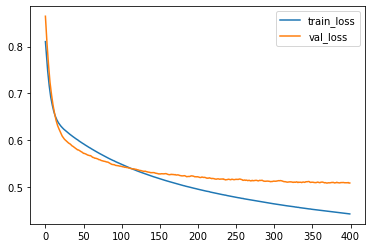

In [5]:
import matplotlib.pyplot as plt
plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

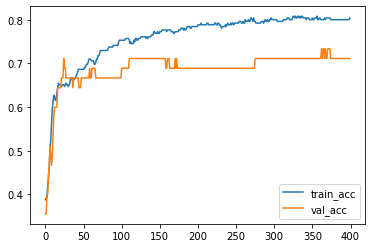

In [6]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

## Regularization
To apply regularization, we just need to modify the layer we added to the model. The argument is `kernel_regularizer`. We would like to set it to be `keras.regularizers.L2(alpha)`, where `alpha` is the regularization strength.

In [7]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1],
                       kernel_regularizer=regularizers.L2(0.5)))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30,
                 validation_data=(X_test, y_test))


Epoch 1/400


1/9 [==>...........................] - ETA: 2s - loss: 1.7373 - accuracy: 0.2667

9/9 [==============================] - 1s 30ms/step - loss: 1.5854 - accuracy: 0.3490 - val_loss: 1.4497 - val_accuracy: 0.4444


Epoch 2/400


1/9 [==>...........................] - ETA: 0s - loss: 1.4608 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 1.4163 - accuracy: 0.3765 - val_loss: 1.2995 - val_accuracy: 0.4222


Epoch 3/400


1/9 [==>...........................] - ETA: 0s - loss: 1.2850 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 1.2794 - accuracy: 0.4235 - val_loss: 1.1771 - val_accuracy: 0.4444


Epoch 4/400


1/9 [==>...........................] - ETA: 0s - loss: 1.1958 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 1.1680 - accuracy: 0.4392 - val_loss: 1.0794 - val_accuracy: 0.5111


Epoch 5/400


1/9 [==>...........................] - ETA: 0s - loss: 1.0870 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 1.0779 - accuracy: 0.4784 - val_loss: 0.9997 - val_accuracy: 0.6222


Epoch 6/400


1/9 [==>...........................] - ETA: 0s - loss: 1.0324 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 1.0044 - accuracy: 0.5529 - val_loss: 0.9341 - val_accuracy: 0.6444


Epoch 7/400


1/9 [==>...........................] - ETA: 0s - loss: 0.9424 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.9439 - accuracy: 0.5686 - val_loss: 0.8815 - val_accuracy: 0.6222


Epoch 8/400


1/9 [==>...........................] - ETA: 0s - loss: 0.9069 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.8944 - accuracy: 0.5882 - val_loss: 0.8374 - val_accuracy: 0.6444


Epoch 9/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8795 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.8534 - accuracy: 0.5961 - val_loss: 0.8011 - val_accuracy: 0.6889


Epoch 10/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8229 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.8196 - accuracy: 0.5961 - val_loss: 0.7719 - val_accuracy: 0.6889


Epoch 11/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7877 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.7919 - accuracy: 0.6118 - val_loss: 0.7472 - val_accuracy: 0.6889


Epoch 12/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7671 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.7687 - accuracy: 0.6157 - val_loss: 0.7274 - val_accuracy: 0.6889


Epoch 13/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7829 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.7494 - accuracy: 0.6196 - val_loss: 0.7111 - val_accuracy: 0.6889


Epoch 14/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7566 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.7337 - accuracy: 0.6275 - val_loss: 0.6974 - val_accuracy: 0.6889


Epoch 15/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7560 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.7204 - accuracy: 0.6275 - val_loss: 0.6861 - val_accuracy: 0.6889


Epoch 16/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6978 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.7096 - accuracy: 0.6275 - val_loss: 0.6768 - val_accuracy: 0.6889


Epoch 17/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7488 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.7004 - accuracy: 0.6275 - val_loss: 0.6690 - val_accuracy: 0.6889


Epoch 18/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6994 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.6275 - val_loss: 0.6631 - val_accuracy: 0.6889


Epoch 19/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7179 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6865 - accuracy: 0.6275 - val_loss: 0.6576 - val_accuracy: 0.6889


Epoch 20/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7455 - accuracy: 0.4667

9/9 [==============================] - 0s 6ms/step - loss: 0.6812 - accuracy: 0.6275 - val_loss: 0.6534 - val_accuracy: 0.6889


Epoch 21/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6866 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6767 - accuracy: 0.6275 - val_loss: 0.6498 - val_accuracy: 0.6889


Epoch 22/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6644 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6731 - accuracy: 0.6275 - val_loss: 0.6466 - val_accuracy: 0.6889


Epoch 23/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6770 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6699 - accuracy: 0.6275 - val_loss: 0.6442 - val_accuracy: 0.6889


Epoch 24/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7055 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6673 - accuracy: 0.6275 - val_loss: 0.6422 - val_accuracy: 0.6889


Epoch 25/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6895 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6652 - accuracy: 0.6275 - val_loss: 0.6404 - val_accuracy: 0.6889


Epoch 26/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6851 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6634 - accuracy: 0.6275 - val_loss: 0.6389 - val_accuracy: 0.6889


Epoch 27/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6389 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6620 - accuracy: 0.6275 - val_loss: 0.6383 - val_accuracy: 0.6889


Epoch 28/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6689 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6607 - accuracy: 0.6275 - val_loss: 0.6377 - val_accuracy: 0.6889


Epoch 29/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6607 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6598 - accuracy: 0.6275 - val_loss: 0.6373 - val_accuracy: 0.6889


Epoch 30/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6931 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6587 - accuracy: 0.6275 - val_loss: 0.6363 - val_accuracy: 0.6889


Epoch 31/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6356 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6580 - accuracy: 0.6275 - val_loss: 0.6353 - val_accuracy: 0.6889


Epoch 32/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6188 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6573 - accuracy: 0.6275 - val_loss: 0.6348 - val_accuracy: 0.6889


Epoch 33/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6675 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6568 - accuracy: 0.6275 - val_loss: 0.6343 - val_accuracy: 0.6889


Epoch 34/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7141 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6563 - accuracy: 0.6275 - val_loss: 0.6340 - val_accuracy: 0.6889


Epoch 35/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6280 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6560 - accuracy: 0.6275 - val_loss: 0.6334 - val_accuracy: 0.6889


Epoch 36/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6555 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6555 - accuracy: 0.6275 - val_loss: 0.6336 - val_accuracy: 0.6889


Epoch 37/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6478 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6552 - accuracy: 0.6275 - val_loss: 0.6330 - val_accuracy: 0.6889


Epoch 38/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6559 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6549 - accuracy: 0.6275 - val_loss: 0.6325 - val_accuracy: 0.6889


Epoch 39/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6343 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.6275 - val_loss: 0.6322 - val_accuracy: 0.6889


Epoch 40/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7267 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6545 - accuracy: 0.6275 - val_loss: 0.6320 - val_accuracy: 0.6889


Epoch 41/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6467 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.6275 - val_loss: 0.6321 - val_accuracy: 0.6889


Epoch 42/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7316 - accuracy: 0.4667

9/9 [==============================] - 0s 6ms/step - loss: 0.6541 - accuracy: 0.6275 - val_loss: 0.6318 - val_accuracy: 0.6889


Epoch 43/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7404 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6540 - accuracy: 0.6275 - val_loss: 0.6314 - val_accuracy: 0.6889


Epoch 44/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6420 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6537 - accuracy: 0.6275 - val_loss: 0.6316 - val_accuracy: 0.6889


Epoch 45/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6887 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6539 - accuracy: 0.6275 - val_loss: 0.6320 - val_accuracy: 0.6889


Epoch 46/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6260 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6536 - accuracy: 0.6275 - val_loss: 0.6323 - val_accuracy: 0.6889


Epoch 47/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6512 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6535 - accuracy: 0.6275 - val_loss: 0.6321 - val_accuracy: 0.6889


Epoch 48/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6679 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.6318 - val_accuracy: 0.6889


Epoch 49/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6694 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6532 - accuracy: 0.6275 - val_loss: 0.6317 - val_accuracy: 0.6889


Epoch 50/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6542 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6532 - accuracy: 0.6275 - val_loss: 0.6317 - val_accuracy: 0.6889


Epoch 51/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6715 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6531 - accuracy: 0.6275 - val_loss: 0.6315 - val_accuracy: 0.6889


Epoch 52/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6291 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6530 - accuracy: 0.6275 - val_loss: 0.6312 - val_accuracy: 0.6889


Epoch 53/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6521 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6532 - accuracy: 0.6275 - val_loss: 0.6312 - val_accuracy: 0.6889


Epoch 54/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6782 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6530 - accuracy: 0.6275 - val_loss: 0.6311 - val_accuracy: 0.6889


Epoch 55/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6213 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6529 - accuracy: 0.6275 - val_loss: 0.6312 - val_accuracy: 0.6889


Epoch 56/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6512 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6528 - accuracy: 0.6275 - val_loss: 0.6312 - val_accuracy: 0.6889


Epoch 57/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6542 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6527 - accuracy: 0.6275 - val_loss: 0.6308 - val_accuracy: 0.6889


Epoch 58/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6250 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6527 - accuracy: 0.6275 - val_loss: 0.6306 - val_accuracy: 0.6889


Epoch 59/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6071 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6527 - accuracy: 0.6275 - val_loss: 0.6309 - val_accuracy: 0.6889


Epoch 60/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6998 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6527 - accuracy: 0.6275 - val_loss: 0.6307 - val_accuracy: 0.6889


Epoch 61/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5735 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6526 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 62/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6438 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 63/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6256 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6524 - accuracy: 0.6275 - val_loss: 0.6305 - val_accuracy: 0.6889


Epoch 64/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6686 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6524 - accuracy: 0.6275 - val_loss: 0.6300 - val_accuracy: 0.6889


Epoch 65/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5842 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6298 - val_accuracy: 0.6889


Epoch 66/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7046 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6297 - val_accuracy: 0.6889


Epoch 67/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6106 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6297 - val_accuracy: 0.6889


Epoch 68/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6317 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6294 - val_accuracy: 0.6889


Epoch 69/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6389 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6296 - val_accuracy: 0.6889


Epoch 70/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6303 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6293 - val_accuracy: 0.6889


Epoch 71/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6315 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6292 - val_accuracy: 0.6889


Epoch 72/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6490 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6291 - val_accuracy: 0.6889


Epoch 73/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6166 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6291 - val_accuracy: 0.6889


Epoch 74/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6823 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6288 - val_accuracy: 0.6889


Epoch 75/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6614 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6287 - val_accuracy: 0.6889


Epoch 76/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6377 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6283 - val_accuracy: 0.6889


Epoch 77/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6285 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6283 - val_accuracy: 0.6889


Epoch 78/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6564 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6281 - val_accuracy: 0.6889


Epoch 79/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6592 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6283 - val_accuracy: 0.6889


Epoch 80/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6294 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6282 - val_accuracy: 0.6889


Epoch 81/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7164 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6281 - val_accuracy: 0.6889


Epoch 82/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6938 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 83/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6560 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6281 - val_accuracy: 0.6889


Epoch 84/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6954 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6277 - val_accuracy: 0.6889


Epoch 85/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6996 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6277 - val_accuracy: 0.6889


Epoch 86/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6205 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6277 - val_accuracy: 0.6889


Epoch 87/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6539 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6278 - val_accuracy: 0.6889


Epoch 88/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6758 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 89/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6747 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 90/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6716 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6278 - val_accuracy: 0.6889


Epoch 91/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6626 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6277 - val_accuracy: 0.6889


Epoch 92/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6357 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 93/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6619 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6278 - val_accuracy: 0.6889


Epoch 94/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6929 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6275 - val_accuracy: 0.6889


Epoch 95/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6605 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6273 - val_accuracy: 0.6889


Epoch 96/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7237 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 97/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5691 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 98/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6511 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 99/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6202 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 100/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7483 - accuracy: 0.4000

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6272 - val_accuracy: 0.6889


Epoch 101/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6323 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6276 - val_accuracy: 0.6889


Epoch 102/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6537 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6276 - val_accuracy: 0.6889


Epoch 103/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6172 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6273 - val_accuracy: 0.6889


Epoch 104/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6745 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6273 - val_accuracy: 0.6889


Epoch 105/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7101 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6272 - val_accuracy: 0.6889


Epoch 106/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7263 - accuracy: 0.4667

9/9 [==============================] - 0s 6ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 107/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6335 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 108/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6513 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 109/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6728 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6274 - val_accuracy: 0.6889


Epoch 110/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6437 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6275 - val_accuracy: 0.6889


Epoch 111/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6728 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6275 - val_accuracy: 0.6889


Epoch 112/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7142 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6274 - val_accuracy: 0.6889


Epoch 113/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7241 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 114/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6494 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 115/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6629 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 116/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6506 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 117/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6957 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 118/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6845 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 119/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6120 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 120/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6588 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 121/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6666 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6265 - val_accuracy: 0.6889


Epoch 122/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6949 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 123/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6197 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 124/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6452 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 125/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6513 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 126/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6800 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6263 - val_accuracy: 0.6889


Epoch 127/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6110 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 128/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6393 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 129/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6245 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 130/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5804 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6263 - val_accuracy: 0.6889


Epoch 131/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6933 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 132/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6770 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 133/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6440 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 134/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6663 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6255 - val_accuracy: 0.6889


Epoch 135/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6373 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 136/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6310 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 137/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6591 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 138/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6251 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 139/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6677 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 140/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6582 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 141/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6431 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 142/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6182 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6259 - val_accuracy: 0.6889


Epoch 143/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6525 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 144/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6448 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 145/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7196 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 146/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6286 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6255 - val_accuracy: 0.6889


Epoch 147/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6489 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 148/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6770 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 149/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7230 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6256 - val_accuracy: 0.6889


Epoch 150/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6257 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 151/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6198 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 152/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6892 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 153/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7089 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 154/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6206 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 155/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6959 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 156/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6400 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 157/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6700 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 158/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6393 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 159/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6949 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 160/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6627 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 161/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6544 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 162/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6314 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 163/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5865 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 164/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6660 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 165/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6250 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 166/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6531 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 167/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5747 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 168/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6538 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 169/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6413 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 170/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6706 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 171/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6243 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 172/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6548 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 173/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6582 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 174/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6301 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 175/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6595 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 176/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6338 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 177/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6488 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 178/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6447 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 179/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6788 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 180/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5825 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 181/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5807 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 182/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6307 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 183/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5925 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 184/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6845 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 185/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6345 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 186/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6654 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 187/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6572 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 188/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7035 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 189/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6260 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 190/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6208 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 191/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6049 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 192/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6567 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 193/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6557 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 194/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5940 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 195/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6295 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 196/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6030 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 197/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5890 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 198/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6624 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 199/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6710 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 200/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6596 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 201/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6194 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 202/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5599 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 203/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6380 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 204/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6450 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 205/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5580 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 206/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6204 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 207/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6552 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 208/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6974 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 209/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6212 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 210/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6616 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 211/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7166 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 212/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6957 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 213/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6300 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 214/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6175 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 215/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6693 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 216/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6672 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 217/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6523 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 218/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6463 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 219/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6789 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 220/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6660 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 221/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6232 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 222/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6172 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 223/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6361 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 224/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5869 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 225/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6782 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 226/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7051 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 227/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6167 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 228/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6524 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 229/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5983 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 230/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6491 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 231/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6851 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 232/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6789 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 233/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7299 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 234/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6134 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 235/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 236/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 237/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6541 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 238/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6980 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 239/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6829 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 240/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6663 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 241/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6282 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 242/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6227 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 243/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6553 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 244/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6749 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 245/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6148 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 246/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6165 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 247/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6658 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 248/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5870 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 249/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6366 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 250/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6543 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 251/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6597 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 252/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6338 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 253/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6391 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 254/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6720 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 255/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6471 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 256/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6163 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 257/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6972 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 258/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7613 - accuracy: 0.4000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 259/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6784 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 260/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6713 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 261/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6962 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 262/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6477 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 263/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5577 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 264/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6424 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 265/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6957 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 266/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7186 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 267/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6088 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 268/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5620 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 269/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5807 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 270/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6321 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 271/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6190 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 272/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5939 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 273/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6334 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 274/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6597 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 275/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5963 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 276/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7008 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 277/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6307 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 278/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6499 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 279/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6174 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 280/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6086 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 281/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7004 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 282/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7315 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 283/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6508 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 284/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6202 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 285/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6734 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 286/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6264 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 287/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6390 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 288/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6512 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 289/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6679 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 290/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6824 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 291/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6445 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 292/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6800 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 293/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6482 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 294/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6185 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 295/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6426 - accuracy: 0.6333

9/9 [==============================] - 0s 9ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 296/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6712 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 297/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6717 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 298/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6420 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 299/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6905 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 300/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5799 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 301/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5694 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 302/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6880 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 303/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6820 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 304/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5974 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 305/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6313 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 306/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6158 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 307/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7081 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 308/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6578 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 309/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6837 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 310/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6442 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 311/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5679 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 312/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6839 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 313/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6316 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 314/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6051 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 315/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6478 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 316/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6635 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 317/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5785 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 318/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6436 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 319/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7002 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 320/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5701 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 321/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6586 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 322/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7539 - accuracy: 0.4000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 323/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7233 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 324/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6443 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 325/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6708 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 326/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6679 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 327/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6590 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 328/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6331 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 329/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6660 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 330/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 331/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6810 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 332/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7009 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 333/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6413 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 334/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6643 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 335/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6162 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 336/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5744 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 337/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7170 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 338/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5991 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 339/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6211 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 340/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7018 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 341/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5746 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 342/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6044 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 343/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6062 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 344/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6301 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 345/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6098 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 346/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5925 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 347/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5814 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 348/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7306 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 349/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6304 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 350/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7361 - accuracy: 0.4333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 351/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5708 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 352/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6692 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 353/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6620 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 354/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6696 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 355/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5675 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 356/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6448 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 357/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6654 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 358/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7199 - accuracy: 0.5000

9/9 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 359/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6515 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 360/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6400 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 361/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7319 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 362/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6727 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 363/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6427 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 364/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 365/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6181 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 366/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6728 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 367/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6358 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 368/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6243 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 369/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6161 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 370/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7049 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 371/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6799 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 372/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6501 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 373/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7200 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6220 - val_accuracy: 0.6889


Epoch 374/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6633 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 375/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6483 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 376/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7129 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 377/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6860 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 378/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6612 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 379/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6414 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 380/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6204 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6220 - val_accuracy: 0.6889


Epoch 381/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6729 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 382/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6944 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 383/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5904 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 384/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6262 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 385/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6092 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 386/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5936 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 387/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6612 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 388/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6315 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 389/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6617 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 390/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7176 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6219 - val_accuracy: 0.6889


Epoch 391/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6634 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 392/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6447 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 393/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6551 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 394/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5901 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 395/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6490 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 396/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6316 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 397/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7383 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 398/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6644 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 399/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6462 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 400/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6682 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


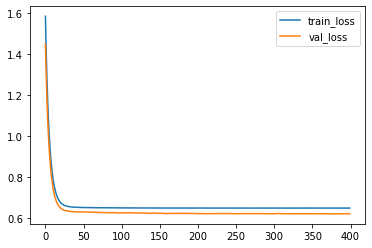

In [8]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

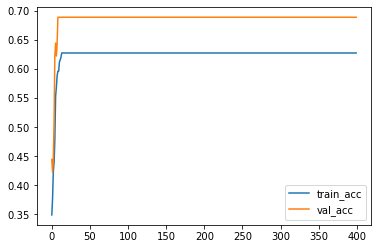

In [9]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

You may compare what we get here with the codes we get before.